In [1]:
# some standard python imports #
import hierarc
import h5py
import copy
import numpy as np
import corner
import emcee
import pickle
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os
from os.path import dirname, abspath
%matplotlib inline

# we give it a random seed to produce the identical plots
np.random.seed(seed=10)

from pylab import rc
rc('axes', linewidth=2)
rc('xtick',labelsize=15)
rc('ytick',labelsize=15)

# import the hierArc, lenstronomy and astropy classes
from hierarc.Sampling.mcmc_sampling import MCMCSampler
from astropy.cosmology import FlatLambdaCDM
from hierarc.Diagnostics.goodness_of_fit import GoodnessOfFit
from lenstronomy.Plots import plot_util
from hierarc.Util.distribution_util import PDFSampling

kwargs_corner = {'bins': 20, 'smooth': 0.7, 'smooth1d': None, 'plot_datapoints': False,
             'label_kwargs': dict(fontsize=20), 'levels': [0.68,0.95],
             'fill_contours': True, 'alpha': 0.2, 
            }


save_figures=True

color1 = '#1b9e77'
color2 = '#d95f02'
color3 = '#7570b3'


In [2]:
n_burn=1000

backend = emcee.backends.HDFBackend("Analysis/all_lenses_chain_OM.h5")
mcmc_samples_sdss_all = backend.get_chain(discard=n_burn, flat=True, thin=1)
log_prob_sdss_all = backend.get_log_prob(discard=n_burn, flat=True, thin=1)
mcmc_samples_sdss_all_plot_OM = copy.deepcopy(mcmc_samples_sdss_all)

mcmc_samples_sdss_all_plot_OM = np.array([([x[0],x[2],x[3],x[1],x[4],x[5],x[6]]) for x in mcmc_samples_sdss_all_plot_OM])

In [3]:
backend = emcee.backends.HDFBackend("Analysis/all_lenses_chain_const.h5")
mcmc_samples_sdss_all = backend.get_chain(discard=n_burn, flat=True, thin=1)
log_prob_sdss_all = backend.get_log_prob(discard=n_burn, flat=True, thin=1)
mcmc_samples_sdss_all_plot_const = copy.deepcopy(mcmc_samples_sdss_all)

mcmc_samples_sdss_all_plot_const = np.array([([x[0],x[2],x[3],x[1],x[4],x[5],x[6]]) for x in mcmc_samples_sdss_all_plot_const])





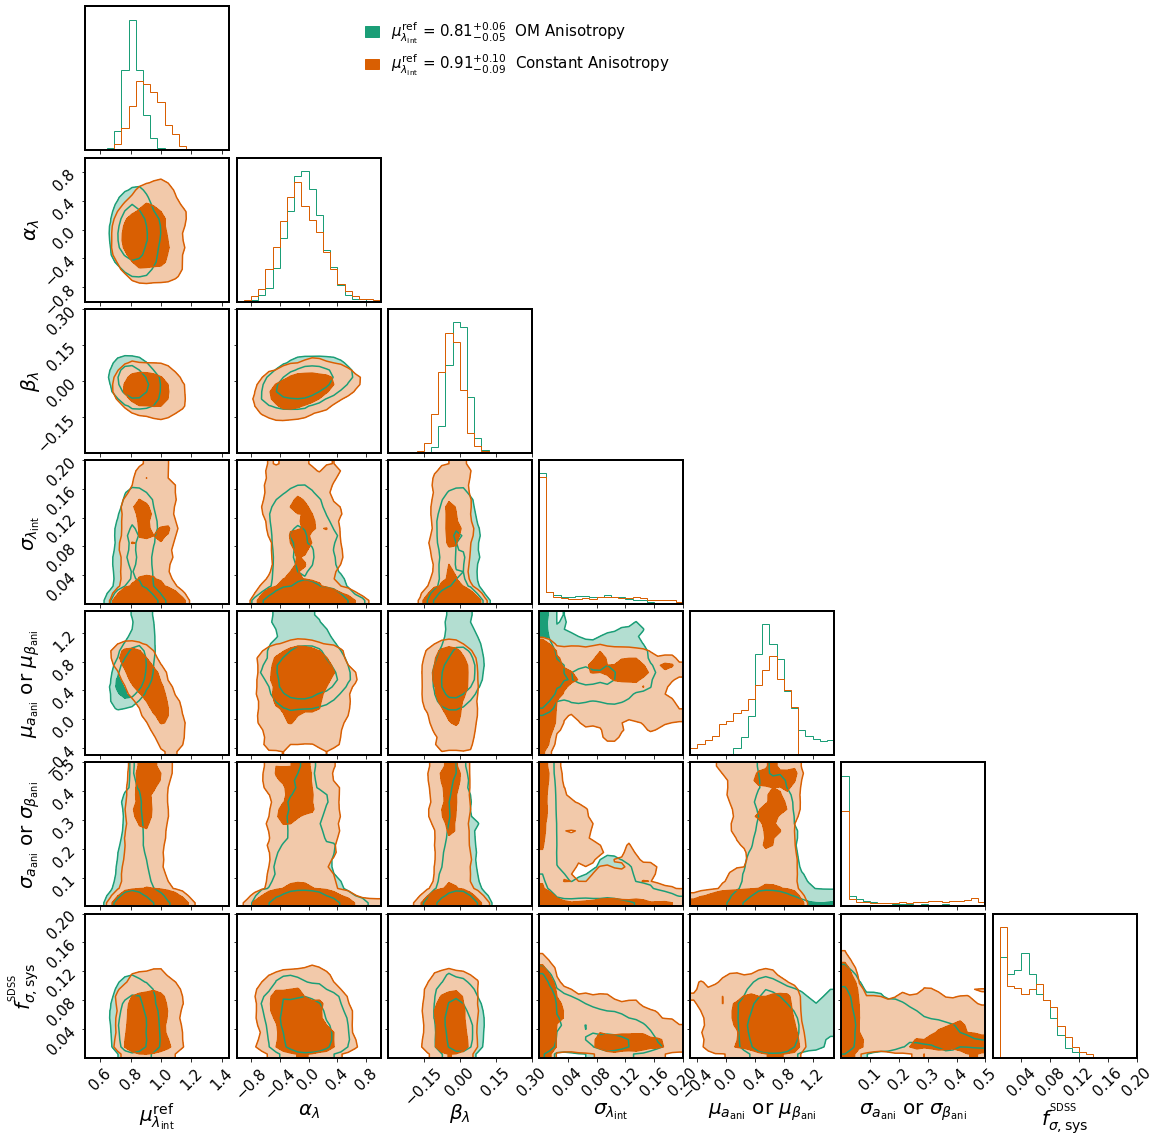

In [4]:

title_list = ['$\\mu_{\\lambda_{\\rm int}}^{\\rm ref}$',
 '$\\alpha_{\\lambda}$',
 '$\\beta_{\\lambda}$',
 '$\\sigma_{\\lambda_{\\rm int}}$',
 '$\\mu_{a_{\\rm ani}}$ or $\\mu_{\\beta_{\\rm ani}}$',
 '$\\sigma_{a_{\\rm ani}}$ or $\\sigma_{\\beta_{\\rm ani}}$',
 '$f^{^{\\rm SDSS}}_{\\sigma, {\\rm{sys}}}$']



fig = corner.corner(mcmc_samples_sdss_all_plot_OM, color=color1,
                    labels=title_list, title_fmt = '.2f',
                    show_titles=False,title_kwargs={"fontsize": 16},
                    range = [(0.5,1.45),(-1,1),(-0.3,0.3),(0,0.2),(-0.5,1.5),(0,0.5),(0,0.2)],
                    hist_kwargs= {'density': True, 'color': color1}, **kwargs_corner)

fig = corner.corner(mcmc_samples_sdss_all_plot_const, color=color2, fig=fig,
                    range = [(0.5,1.45),(-1,1),(-0.3,0.3),(0,0.2),(-0.5,1.5),(0,0.5),(0,0.2)],
                    hist_kwargs= {'density': True, 'color': color2}, **kwargs_corner)



ax = fig.axes[3]
ax.set_visible(True)
ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


alpha= 1
result_string_sdss_quality = plot_util.result_string(mcmc_samples_sdss_all_plot_OM[:,0], weights=None, title_fmt=".2f", label='$\\mu_{\\lambda_{\\rm int}}^{\\rm ref}$')
result_string_sdss_all = plot_util.result_string(mcmc_samples_sdss_all_plot_const[:,0], weights=None, title_fmt=".2f", label='$\\mu_{\\lambda_{\\rm int}}^{\\rm ref}$')
patch_1 = mpatches.Patch(color=color1, label=result_string_sdss_quality+"  OM Anisotropy", alpha=alpha)
patch_2 = mpatches.Patch(color=color2, label=result_string_sdss_all+"  Constant Anisotropy", alpha=alpha)
ax.legend(handles=[patch_1, patch_2], fontsize=15, handlelength=0.9, loc=1, frameon=False)
